<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R_v2/blob/main/Clases/Clase4/02_Ejemplos_adicionales_ggplot2_desarrollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplos adicionales ggplot2

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales Méndez<br>
**E-mail ayudante:** rumorale1@gmail.com

In [3]:
install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(ggplot2)
library(dplyr)
library(nycflights13)


## `stat_bin()`: Permite generar bines en la data y visualizar etiquetas entre otros elementos

1.- Creamos un histograma con 10 bins, y visualizaremos los conteos en etiquetas sobre cada barra del histograma. Para ello considerar a función `stat_bin` con parámetros `geom = 'label'`, y `mapping = aes(label=..count..)`.

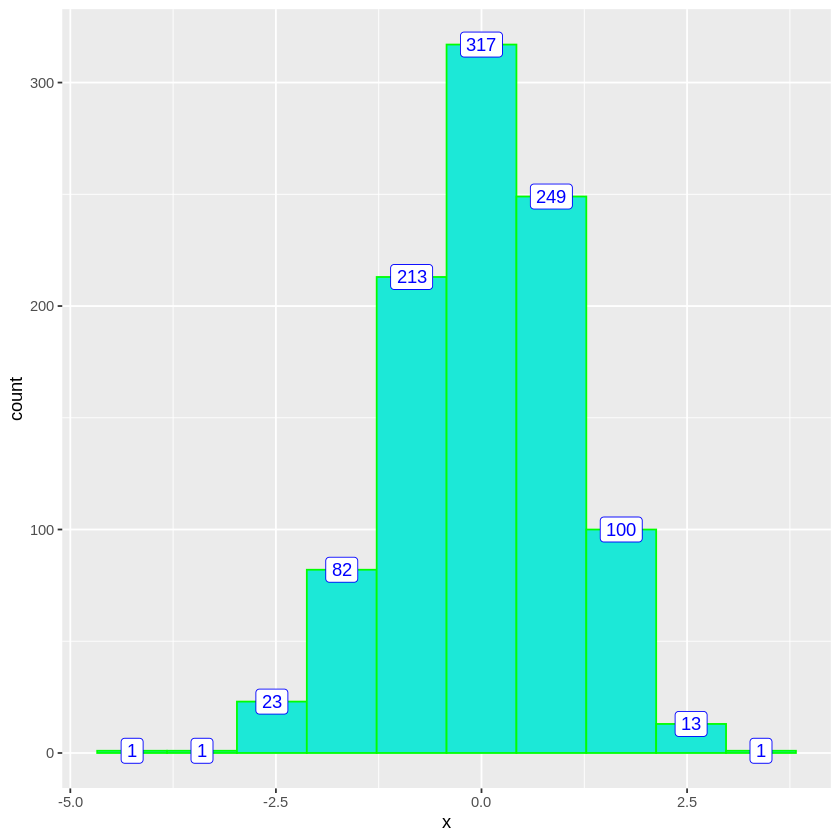

In [5]:
# Histograma de frecuencias relativas
set.seed(15)
data <- data.frame(x = rnorm(1000))

data %>%
  ggplot() +
  aes(x = x) +
  geom_histogram(
    bins = 10,
    ## Opcional
    col = "green",
    fill = "#1ce8d7"
  ) + 
  stat_bin(
    bins = 10,
    geom = "label",
    color = "blue",
    mapping = aes(label = ..count..)
  )




2.- Misma Visualización pero con histograma de frecuencias relativas.

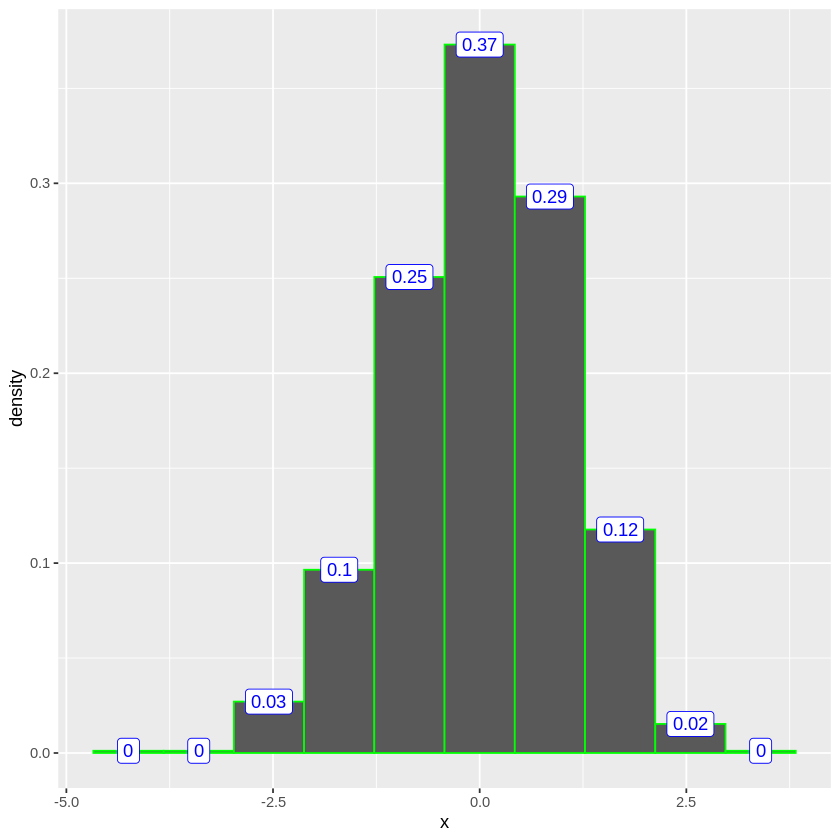

In [53]:
# Adicionalmente, si se quiere mostrar el histograma de frecuencia --------
#  es lo mismo pero se añade y = ..density.. en el maepo estético del histograma
data %>%
  ggplot() +
  aes(x = x, y = ..density.. ) +
  geom_histogram(
    bins = 10,
    ## Opcional
    col = "green",
    # fill = "#1ce8d7"
  ) + 
  stat_bin(
    bins = 10,
    geom = "label",
    color = "blue",
    mapping = aes(label = round(..density.., 2))
  )



## `theme()`: Permite modificar diversos parámetros gráficos, en particualar la orientación de los ejes.

En este ejemplo consideraremos la data de vuelos, para o cual buscaremos visualizar la serie que contiene el total de vuelos por cada día. 
Adicionalmente modificaremos la orientación de las etiquetas del eje X mediante la función `theme()`.

`summarise()` has grouped output by 'year', 'month'. You can override using the `.groups` argument.



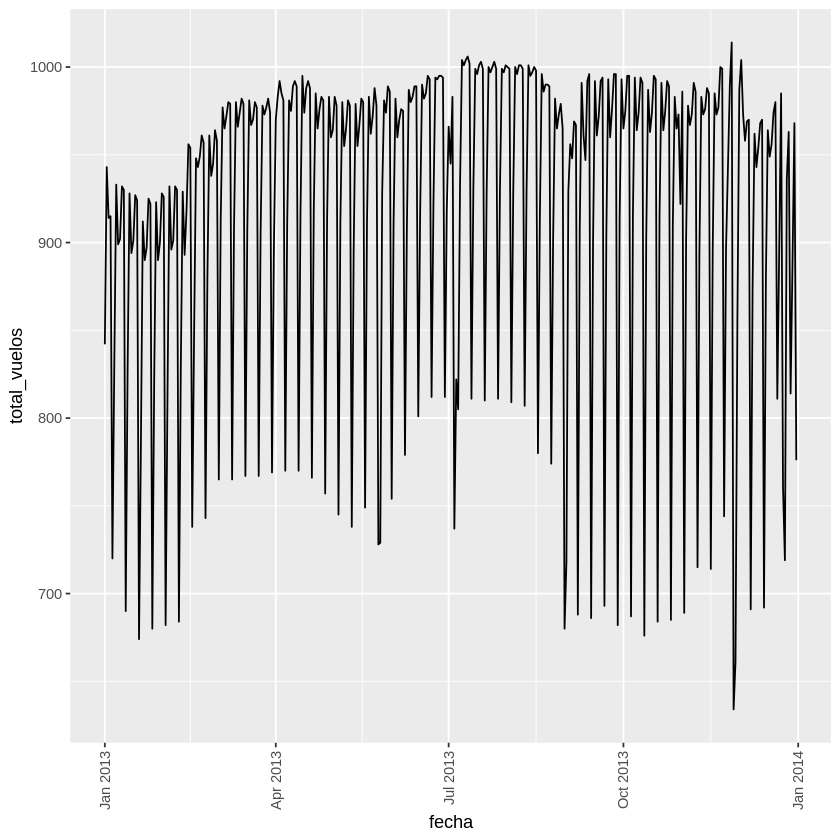

In [7]:
# Orientación etiquetas ejes ----------------------------------------------
data(flights)

# A modo de ejemplo podemos visulizar el total de vuelos por día .

flights %>%
  group_by(year,month,day) %>%
  summarise(total_vuelos = n()) %>%
  mutate(fecha = as.Date(paste0(year,
                                ifelse(nchar(month) == 1, paste0("0",month),month),
                                ifelse(nchar(day) == 1, paste0("0",day),day)
                                ),
                                format = "%Y%m%d")) %>%
  ggplot() +
  aes(x = fecha, y = total_vuelos) + 
  geom_line() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = .5,hjust = 1)
  ) 

# La función element_text() permite modificar orientación, y ajste vertical y hoizontal



## `geom_label()`: Al igual que `geom_text()`, permite añadir etiquetas en la visualización, sin la necesidad de generar manualmente los bins.

Para ello, como ejercicio, buscaremos replicar el siguiente gráfico que contiene para cada aeropuerto de origen, los 4 aeropuertos de destino con mayor cantidad de vuelos.

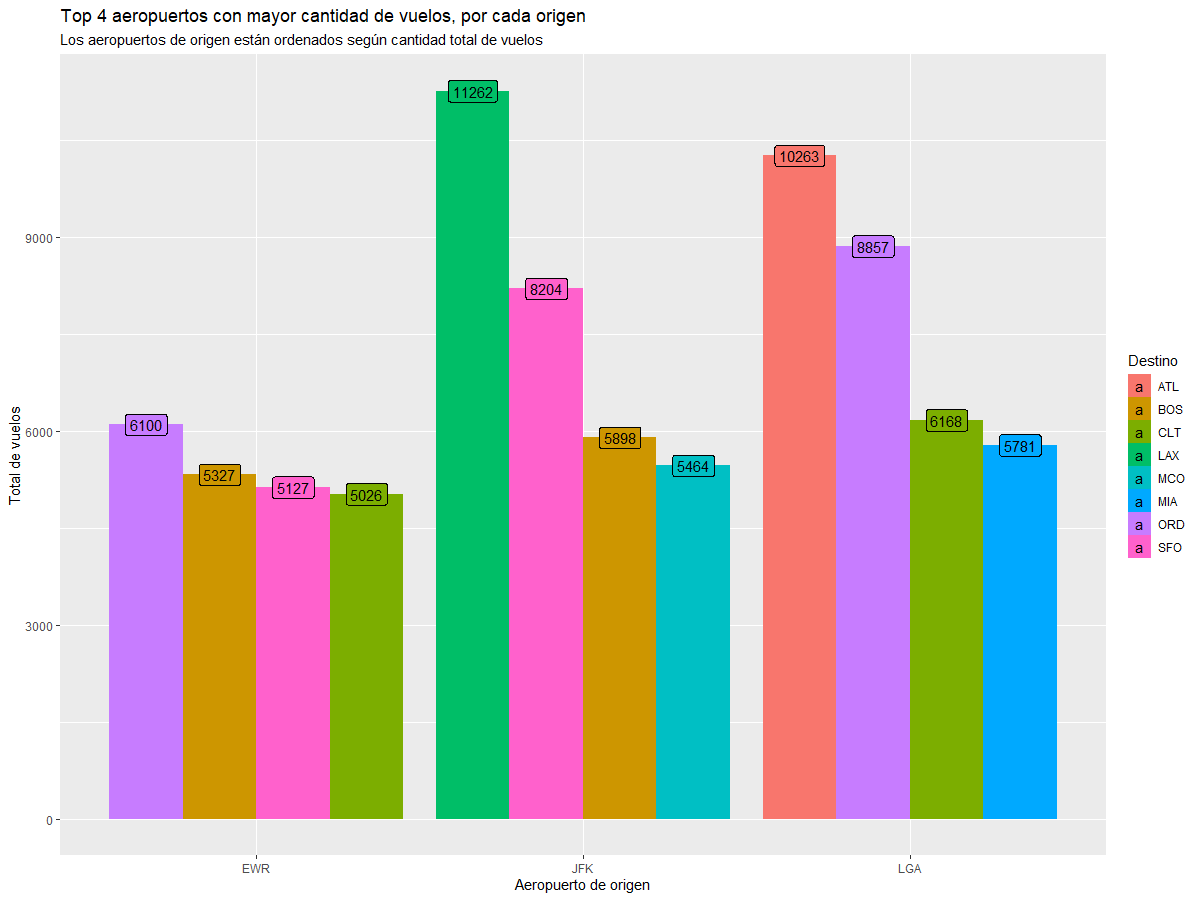


In [ ]:
flights %>% group_by(origin ) %>% summarise( total_vuelos = n() ) %>%
ggplot() +
aes(x = origin, y = total_vuelos) +
geom_bar(stat = "identity")

# stat: Identity = hay que entregar el conteo
# stat: 
# position: stack aplilando
# position: dodge lado a lado


# flights %>% group_by(origin ) %>% summarise( total_vuelos = n() ) %>%
# ggplot() +
# aes(x = origin) +
# geom_bar()

`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



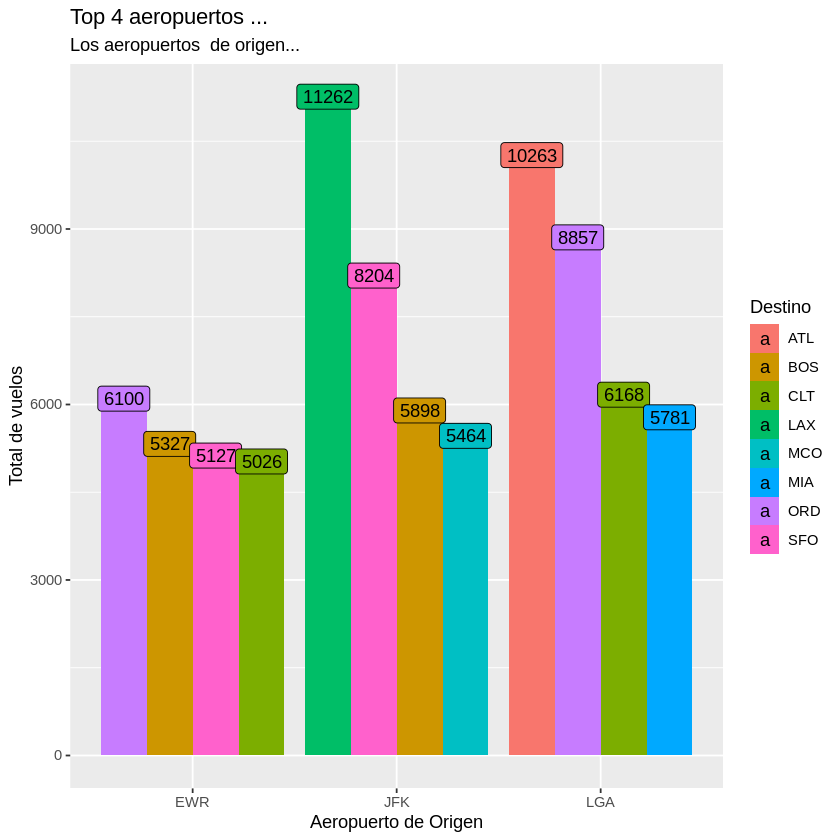

In [124]:
# flights %>% group_by(origin, dest) %>% summarise(total_vuelos = n())
# Opcion 2
# flights %>% group_by(origin, dest) %>% count() %>% rename(total_vuelos = n)
# Opcion 3
# flights %>% group_by(origin, dest) %>% count() %>% mutate(total_vuelos = n, n = NULL)

# top_n()
# slice_max()

# Opcion 2
# flights %>% 
# group_by(origin, dest) %>% 
# summarise(total_vuelos = n()) %>%
# slice_max(total_vuelos, n  = 4)


# Opcion 3
# flights %>% 
# group_by(origin, dest) %>% 
# summarise(total_vuelos = n()) %>%
# arrange(desc(total_vuelos)) %>%
# slice(1:4)

# flights %>% 
# group_by(origin, dest) %>% 
# summarise(total_vuelos = n()) %>%
# slice_max(total_vuelos, n  = 4) 


flights %>% 
group_by(origin, dest) %>% 
summarise(total_vuelos = n()) %>%
slice_max(total_vuelos, n  = 4) %>%
ggplot() +
aes(x = origin, y = total_vuelos, fill = dest, group = -total_vuelos ) +
geom_bar( stat = "identity", position = "dodge") + 
geom_label(aes(label = total_vuelos), position = position_dodge(width = 0.9)) +
# geom_text(position = position_dodge(width = 0.9))
labs(title = "Top 4 aeropuertos ...",  
     subtitle = "Los aeropuertos  de origen...",  
     x = "Aeropuerto de Origen", 
     y = "Total de vuelos",  
     fill = "Destino")
      # xlab("aeropuerto origen")

`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.

Selecting by total_vuelos



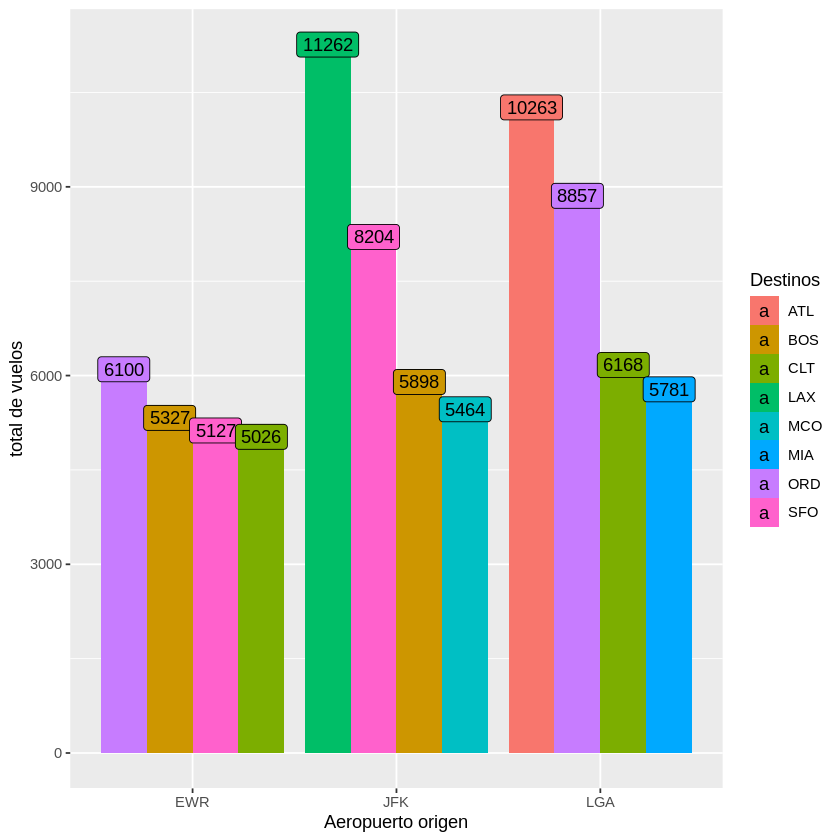

In [42]:
flights %>% 
group_by(origin, dest) %>%
summarise(total_vuelos = n()) %>% 
top_n(4) %>%
slice_max(total_vuelos, n = 4) %>% 
ggplot() +
aes(x = origin, y = total_vuelos, fill = dest, group = -total_vuelos, label = total_vuelos) + 
geom_bar(stat = "identity", position = "dodge") + 
geom_label( position = position_dodge(width = 0.9) )+
labs(x = "Aeropuerto origen", y = "total de vuelos", fill = "Destinos")

In [ ]:
## OPCIÓN 1
flights %>%
  group_by(origin, dest) %>%
  summarise(total_vuelos = n()) %>% 
  group_by(origin) %>% # Se explicita que el top 4 que sigue, lo calcule por cada grupo dado por _origin_
  top_n(n = 4, wt = total_vuelos)

`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



origin,dest,total_vuelos
<chr>,<chr>,<int>
EWR,BOS,5327
EWR,CLT,5026
EWR,ORD,6100
EWR,SFO,5127
JFK,BOS,5898
JFK,LAX,11262
JFK,MCO,5464
JFK,SFO,8204
LGA,ATL,10263


In [ ]:
## OPCIÓN 2
flights %>%
  group_by(origin, dest) %>%
  summarise(total_vuelos = n()) %>% 
  group_by(origin) %>%
  arrange(desc(total_vuelos), .by_group = TRUE) %>%
  mutate(rk = row_number()) %>%
  filter(rk <= 4)

`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



origin,dest,total_vuelos,rk
<chr>,<chr>,<int>,<int>
EWR,ORD,6100,1
EWR,BOS,5327,2
EWR,SFO,5127,3
EWR,CLT,5026,4
JFK,LAX,11262,1
JFK,SFO,8204,2
JFK,BOS,5898,3
JFK,MCO,5464,4
LGA,ATL,10263,1


`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



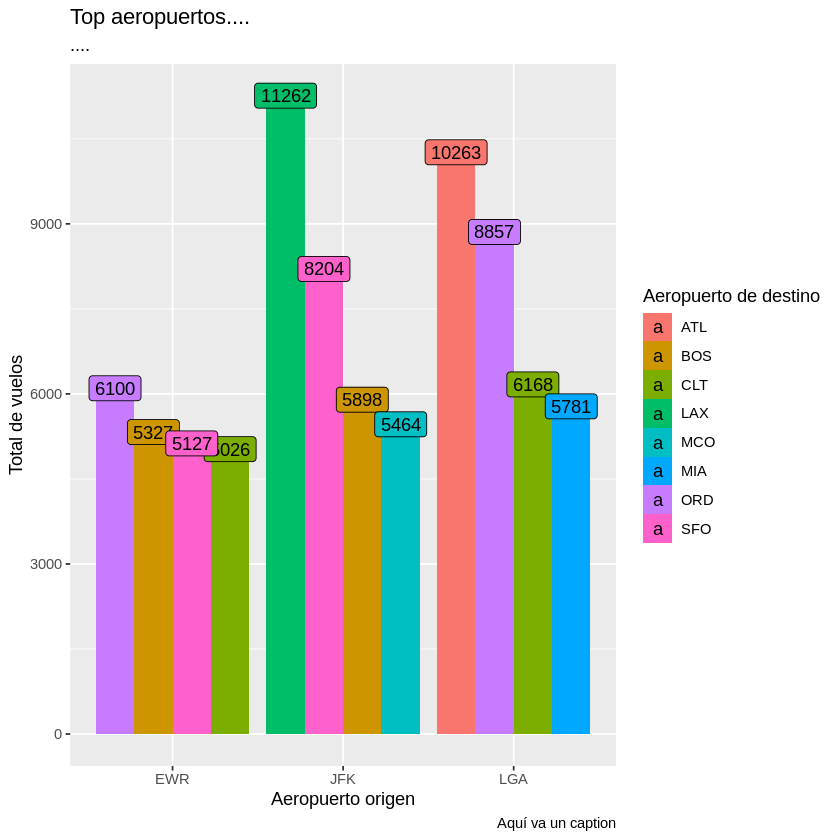

In [ ]:
options(rep.plot.width = 20, rep.plot.height = 20)
# Contamos con las capas geom_label y geom_text ---------------------------------
# Para ello visualizaremos los 4 aeropuertos de destino con mayor cantidad de vuelos, por cada aeropuerto de origen
flights %>%
  group_by(origin, dest) %>%
  summarise(total_vuelos = n()) %>% 
  group_by(origin) %>% # Se explicita que el top 4 que sigue, lo calcule por cada grupo dado por _origin_
  top_n(n = 4, wt = total_vuelos) %>%
  ggplot() +
  aes(x = origin,
      y = total_vuelos,
      # color = dest, # colorea el contorno
      fill = dest, # colorea l relleno
      group = -total_vuelos # Con este parámetro podemos indicar el orden en el que se generan las visulizaciones dentro de cada grupo identificado (en este caso por la variable fill)
      ) +
  geom_bar(stat = "identity",
           position = "dodge" #"stack" por defecto
  ) +
  geom_label(aes(label = total_vuelos),
             color = "black",
             position = position_dodge(width = 0.9)
             ) +
  labs(x = "Aeropuerto origen",
         y = "Total de vuelos",
         title = "Top aeropuertos....",
         subtitle = "....",
         caption = "Aquí va un caption",
         fill = "Aeropuerto de destino")